# 회귀분석(Regression)
-  독립변수(x)와 종속변수(y)의 관계식을 구하는 기법
-  독립변수(영향을 주는 변수)가 한단위 증가할 때 종속변수(영향을 받는 변수)가 얼마나 영향을 받는지 분석하는 방법
-  회귀식, 회귀계수

-  ## 단순회귀분석
    -  독립변수가 1개인 회귀모형
    -  ex) 기업의 광고집행액(x)를 이용하여 그 기업의 매출액(y)를 예측하는 모형
    
-  ## 다중회귀분석
    -  독립변수가 2개 이상인 회귀모형
    -  ex) 학생의 학원수(x1)와 하루 평균학습시간(x2)을 이용하여 그 학생의 성적(y)를 예측하는 모형

-  기울기
    -  $Y값의 증가량 \over X값의 증가량$
    -  X: 독립변수
    -  Y: 종속변수
    -  X값에 따라 Y값이 달라진다

-  회귀식
    -  $Y = aX + b$
    -  a: 회귀계수, 기울기
    -  b: Y의 절편
    -  $a = {\sum(x-x평균)(y-y평균) \over \sum(x-x평균)^2}$
    -  $b = y평균 - (기울기 * x평균)$


In [13]:
import numpy as np

x = [2,4,6,8]
y = [71,83,91,97]
mx = np.mean(x)
my = np.mean(y)
result = sum([(x[i]-mx)*(y[i]-my) for i in range(len(x))])
result_sub = sum([pow((x[i]-mx),2) for i in range(len(x))])
a = result/result_sub
b = my - (a * mx)
print('기울기는 {}, 절편은 {} 입니다'.format(a, b))

기울기는 4.3, 절편은 64.0 입니다


In [14]:
import numpy as np
x = np.array([2, 4, 6, 8])
y = np.array([71, 83, 91, 97])
x_mean = np.mean(x)
y_mean = np.mean(y)
denominator = sum([(i-x_mean)**2 for i in x])
def func(x, x_m, y, y_m):
    s = 0
    for i in range(len(x)):
        s += (x[i]-x_m) * (y[i]-y_m)
    return s
numerator = func(x, x_mean, y, y_mean)
a = numerator/denominator
b = y_mean - (a * x_mean)
print('기울기:', a)
print('절편:', b)

기울기: 4.3
절편: 64.0


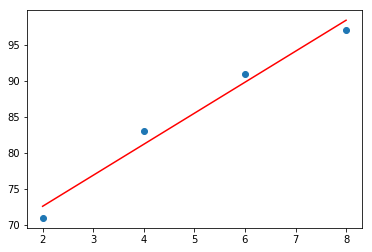

In [17]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot(x, a*x+b, c='red')
plt.show()

In [19]:
print('실제값:', y)
print('예측값:', a*x+b)
print('오차:', y-(a*x+b))

실제값: [71 83 91 97]
예측값: [72.6 81.2 89.8 98.4]
오차: [-1.6  1.8  1.2 -1.4]


# 평균제곱근오차(root mean square error) rmse
-  주어진 선의 오차를 평가하는 오차평가알고리즘
-  오차 = 실제값 - 예측값
-  평균제곱오차(mse) = $\sum (실제값-예측값)^2 \over n$
-  평균제곱근오차(rmse) = $\sqrt {\sum(실제값-예측값)^2 \over n} $

In [21]:
import math
import numpy as np
pred = a*x+b
math.sqrt(np.mean([pow(y[i]-pred[i],2) for i in range(len(y))]))

1.5165750888103096

In [22]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [23]:
iris = pd.read_csv('data/iris.csv', encoding='utf-8')

In [24]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
x = iris.iloc[:,:-1]
y = iris.iloc[:,-1]
logreg = LogisticRegression()
logreg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
new_observation = [[5.1, 3.5, 2.4, 0.2]]
logreg.predict(new_observation)

array(['Iris-setosa'], dtype=object)

In [30]:
new_observation = [[6.9, 3.2, 5.7, 2.3]]
logreg.predict(new_observation)

array(['Iris-virginica'], dtype=object)

# logistic regression
-  가장 흔한 분류인 이분법을 기준으로 분류

## statsmodels
검정 및 추정(test and estimation)
회귀분석(regression analysis)
시계열분석

In [31]:
import statsmodels.api as sm
import pandas as pd

df = pd.read_csv('data/titanic.csv')
df.head()

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
cols = ['survived', 'age', 'fare']
# pd.get_dummies() 하나의 컬럼을 여러개의 더미 컬럼으로 나누는 함수
dummy_pclass = pd.get_dummies(df['pclass'], prefix='pclass')
dummy_gender = pd.get_dummies(df['gender'], prefix='gender')
df[cols]

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [39]:
data = df[cols].join(dummy_pclass)
data = data.join(dummy_gender)
data.isnull().sum()

survived           0
age              177
fare               0
pclass_1           0
pclass_2           0
pclass_3           0
gender_female      0
gender_male        0
dtype: int64

In [40]:
data1 = data.copy()

In [42]:
data1['age'].fillna(data1['age'].median(skipna=True), inplace=True)
data1.isnull().sum()

survived         0
age              0
fare             0
pclass_1         0
pclass_2         0
pclass_3         0
gender_female    0
gender_male      0
dtype: int64

In [43]:
train_cols = data1.columns[1:]
train_cols

Index(['age', 'fare', 'pclass_1', 'pclass_2', 'pclass_3', 'gender_female',
       'gender_male'],
      dtype='object')

In [44]:
logit = sm.Logit(data1['survived'], data1.iloc[:,1:])
result = logit.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.451962
         Iterations 6


C:\Users\stu\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\stu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\stu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\stu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.321     
Dependent Variable: survived         AIC:              817.3956  
Date:               2018-10-30 15:36 BIC:              846.1497  
No. Observations:   891              Log-Likelihood:   -402.70   
Df Model:           5                LL-Null:          -593.33   
Df Residuals:       885              LLR p-value:      3.2405e-80
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
age               -0.0329   0.0074 -4.4271 0.0000 -0.0475 -0.0183
fare               0.0008   0.0021  0.3611 0.7180 -0.0034  0.0049
pclass_1           1.5328      nan     nan    nan     nan     nan
pclass_2           0.4622      nan     nan    nan     nan     nan
pclass_3          -0.7497      nan     nan    nan     nan     nan
gender_female      1.9249      nan     nan    nan     nan     nan
gender_male       -0.6798      nan     nan    nan     nan     nan
=================================================================

"""

In [45]:
# 가중치 설정
data1['intercept'] = 1.0
train_cols = data1.columns[1:]
logit = sm.Logit(data1['survived'], data1.iloc[:,1:])
result = logit.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.451962
         Iterations 10


C:\Users\stu\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\stu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\stu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\stu\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit               Pseudo R-squared:    0.321     
Dependent Variable:      survived            AIC:                 817.3956  
Date:                    2018-10-30 15:44    BIC:                 846.1497  
No. Observations:        891                 Log-Likelihood:      -402.70   
Df Model:                5                   LL-Null:             -593.33   
Df Residuals:            885                 LLR p-value:         3.2405e-80
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          10.0000                                            
----------------------------------------------------------------------------
               Coef.    Std.Err.      z    P>|z|      [0.025       0.975]   
----------------------------------------------------------------------------
age           -0.0329       0.0074 -4.4271 0.0000       -0.0475      -0.0183
fare           0.0008       0.0021  0.3611 0.7180       -0.0034       0.0049
pclass_1       1.3064          nan     nan    nan           nan          nan
pclass_2       0.2358          nan     nan    nan           nan          nan
pclass_3      -0.9761          nan     nan    nan           nan          nan
gender_female  1.5854 2952743.2140  0.0000 1.0000 -5787268.7698 5787271.9405
gender_male   -1.0194 2952743.2140 -0.0000 1.0000 -5787271.3745 5787269.3358
intercept      0.5660          nan     nan    nan           nan          nan
============================================================================

"""

In [48]:
data1['predict'] = result.predict(data1[train_cols])
data1.sort_values('predict', ascending=False)

,survived,age,fare,pclass_1,pclass_2,pclass_3,gender_female,gender_male,intercept,predict
297,0,2.0,151.5500,1,0,0,1,0,1.0,0.970882
689,1,15.0,211.3375,1,0,0,1,0,1.0,0.957896
435,1,14.0,120.0000,1,0,0,1,0,1.0,0.956405
311,1,18.0,262.3750,1,0,0,1,0,1.0,0.955410
700,1,18.0,227.5250,1,0,0,1,0,1.0,0.954271
504,1,16.0,86.5000,1,0,0,1,0,1.0,0.952441
307,1,17.0,108.9000,1,0,0,1,0,1.0,0.951715
329,1,16.0,57.9792,1,0,0,1,0,1.0,0.951452
742,1,21.0,262.3750,1,0,0,1,0,1.0,0.951012
853,1,16.0,39.4000,1,0,0,1,0,1.0,0.950797
